In [73]:
import numpy as np

In [11]:
counter = 0

for x in range(1000000):
    a = np.random.uniform(-1,1)
    b = np.random.uniform(-1,1)
    
    if a**2 + b**2 < 1:
        counter = counter + 1
        
fraction = counter / 1000000
print(fraction*4)

3.13808


In [14]:
def f(x):
    y = x**2
    
    return y

print(f(5))

25


_Encapsulation_ is the programming practice of separating out a certain coding routine or recipe into a re-usable script.

In [16]:
def estimate_pi(num_steps):
    counter = 0

    for x in range(num_steps):
        a = np.random.uniform(-1,1)
        b = np.random.uniform(-1,1)

        if a**2 + b**2 < 1:
            counter = counter + 1

    fraction = counter / num_steps
    return fraction*4

print(estimate_pi(100))

3.44


In [34]:
def estimate_vol(num_steps):
    counter = 0

    for x in range(num_steps):
        a = np.random.uniform(-1,1)
        b = np.random.uniform(-1,1)
        c = np.random.uniform(-1,1)

        if a**2 + b**2 + c**2 < 1:
            counter = counter + 1

    fraction = counter / num_steps
    return fraction*8

print(estimate_vol(100000))

4.18248


In [48]:
def estimate_vol_n(num_steps, dim):
    counter = 0

    for x in range(num_steps):
        
        sum_of_squares = 0
        
        for i in range(dim):
            a = np.random.uniform(-1,1)
        
            sum_of_squares = sum_of_squares + a**2
            
        if sum_of_squares < 1:
            counter = counter + 1

    fraction = counter / num_steps
    return fraction*(2**dim)

print(estimate_vol_n(100000, 5))

5.2864


_Recursion_ is the practice of calling a function inside that same function's definition.

In [53]:
def recursive_example(n):
    if n==0:
        print("n is now zero")
        
    else:
        print("n is currently", n)
        return(recursive_example(n-1))
    
recursive_example(3)

n is currently 3
n is currently 2
n is currently 1
n is now zero


In [56]:
def get_fibonacci(n):
    """
    This function returns the n-th Fibonacci number, where n=0 gives 0 and n=1 gives 1
    """
    if n==0:
        return 0
    
    elif n==1:
        return 1
    
    else:
        return get_fibonacci(n-1) + get_fibonacci(n-2)

print(get_fibonacci(6))

8


In [57]:
def factorial(n):
    if n==0:
        return 1
    else:
        return n*factorial(n-1)
    
factorial(6)

720

In [71]:
def estimate_area(dr, R):
    running_area = 0
    
    for this_r in np.arange(0, R, dr):
        this_area = 2*np.pi*this_r*dr
        running_area += this_area
        
    return running_area

estimate_area(dr = 0.000001, R = 3)

28.27432445753017

In [68]:
actual_area = np.pi*3**2
print(actual_area)

28.274333882308138


In [82]:
np.arange(-1,1,0.1)

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

In [75]:
import numpy as np

def estimate_area(f, a, b, dx):
    counter = 0
    
    for x in np.arange(a,b,dx):
        this_area = f(x)*dx
        counter += this_area
        
    return counter

for n in range(2,8):
    
    def this_monomial(x):
        return x**n
    
    print(estimate_area(this_monomial,0,1,0.001), "looks close to", 1/(n+1))

0.33283350000000034 looks close to 0.3333333333333333
0.2495002499999998 looks close to 0.25
0.19950033333330006 looks close to 0.2
0.16616708333325006 looks close to 0.16666666666666666
0.1423576428569762 looks close to 0.14285714285714285
0.12450058333304169 looks close to 0.125


In [80]:
def f(x):
    return np.sqrt(1 - x**2)

my_pi_estimate = 2*estimate_area(f, -1, 1, dx=0.0001)
print(my_pi_estimate)

3.1415914776116542


Let's review the steps to arrive at an operational definition of $\cos ( \theta )$.

* Definition of angle. We choose *radian measure*, which means $\theta = \frac{\ell}{r} = \ell$, since $r=1$ for a unit circle. Therefore, we can always replace $\theta$ with $\ell$ and speak about lengths rather than angles.

* Next, note that the area of the sector subtended by angle $\theta = \ell$ is given by $A = \frac{\ell}{2}$.

* As a first step, we write a function $A(x)$ which gives the area of the circular sector which intersects a point $(x,y)$ on the unit circle. This function is:

$$ A ( x ) = \frac{x \sqrt{1 - x^2}}{2} + \int_x^1 \sqrt{1 - t^2} \, dt . $$

* Now we need to *invert* the function $A(x)$. That is, we need a function which takes *as input* an area $A(x)$ and as *output* spits out the value $x$ associated with that area. We do this using *bisection search*, which gives us a way of finding the input $y$ so that a function $f(y) = z$ returns a fixed output $z$.

In [126]:
def estimate_area(f, a, b, dx):
    running_area = 0
    
    for i in np.arange(a, b, dx):
        running_area += f(i)*dx
        
    return running_area

def circle_area(t):
    return np.sqrt(1-t**2)

def A(x):
    return (1/2)*x*np.sqrt(1-x**2) + estimate_area(circle_area, x, 1, dx=0.001)

In [150]:
def does_change_sign(g, a, b):
    if g(a)*g(b) < 0:
        return True
    elif g(a)*g(b) > 0:
        return False

def bisect(g, a, b, tolerance):
    if not does_change_sign(g, a, b):
        print("The function does not change sign on the interval")
        return
    
    m=(a+b)/2
    
    if np.abs(g(m))<tolerance:
        return m
    
    if does_change_sign(g, a, m):
        return bisect(g, a, m, tolerance)
    
    if does_change_sign(g, m, b):
        return bisect(g, m, b, tolerance)
    
def g(x):
    return x**3-x-2

print(bisect(g, 1, 2, 0.0001))

1.521392822265625


We can write a formula for the area under the semi-circle of radius $R=3$. Doing so, one finds

$$ \int_{-3}^{3} \sqrt{9 - t^2} \, dt = \frac{9 \pi}{2} $$

In [154]:
def our_cosine(ell):
    area = ell/2
    
    def function_to_root(x):
        return A(x) - area
    
    our_root = bisect(function_to_root, -1, 1, 0.001)
    
    return our_root

print(our_cosine(1.51627))

0.0546875


In [155]:
np.cos(1.51627)

0.05449931192282796

In [156]:
x = np.linspace(0.001, np.pi - 0.001, 100)
outputs = []

for i in x:
    outputs.append(our_cosine(i))

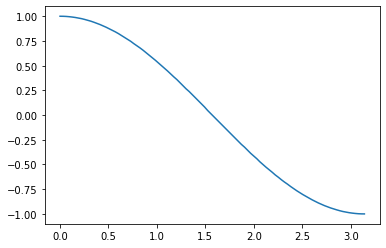

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, outputs)

In [166]:
def different_cosine(x):
    return np.cos(x)

def integral_of_cosine(x):
    this_area = estimate_area(different_cosine, 0.001, x, dx = 0.01)
    
    return this_area

print(integral_of_cosine(np.pi / 2 * (0.99)))

1.0038947085765284


In [167]:
our_x_values = np.arange(0.01, np.pi - 0.01, 0.01)
our_integral_outputs = []

for i in our_x_values:
    our_integral_outputs.append(integral_of_cosine(i))

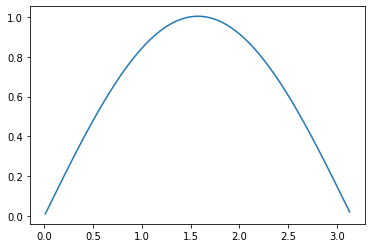

In [169]:
plt.plot(our_x_values, our_integral_outputs)

In [172]:
def our_sine(x):
    return np.sqrt(1 - our_cosine(x)**2)

print(our_sine(np.pi/8))

0.38280751750584047


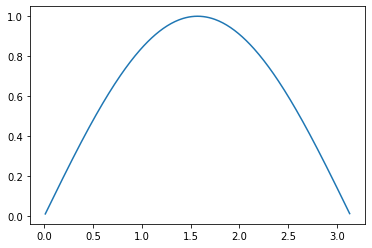

In [175]:
our_sine_values = []

for i in our_x_values:
    our_sine_values.append(np.sin(i))
    
plt.plot(our_x_values, our_sine_values)